<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Откроем-файлы-и-изучим-их" data-toc-modified-id="Откроем-файлы-и-изучим-их-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Откроем файлы и изучим их</a></span></li><li><span><a href="#Рассчитаем-эффективность-обогащения" data-toc-modified-id="Рассчитаем-эффективность-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Рассчитаем эффективность обогащения</a></span></li><li><span><a href="#Проанализируем-признаки,-недоступные-в-тестовой-выборке" data-toc-modified-id="Проанализируем-признаки,-недоступные-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проанализируем признаки, недоступные в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравним распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах" data-toc-modified-id="Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишем-функцию-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Напишем-функцию-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишем функцию для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Обучим-разные-модели-и-оценим-их-качество-кросс-валидацией.-Выберем-лучшую-модель-и-проверим-её-на-тестовой-выборке" data-toc-modified-id="Обучим-разные-модели-и-оценим-их-качество-кросс-валидацией.-Выберем-лучшую-модель-и-проверим-её-на-тестовой-выборке-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Откроем файлы и изучим их

In [1]:
# Импорт библиотек
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [2]:
%matplotlib inline
figsize = (10, 7)

In [3]:
# Открываем файлы
pth1 = 'datasets/gold_recovery_train_new.csv'
pth2 = 'datasets/gold_recovery_test_new.csv'
pth3 = 'datasets/gold_recovery_full_new.csv'

df_train = pd.read_csv(pth1, sep=',')
df_test = pd.read_csv(pth2, sep=',')
df_full = pd.read_csv(pth3, sep=',')

Посмотрим на данные

In [4]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [7]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


В тестовом датафрейме не наблюдаем столбцы с этапом output.

В полном же датафрейме имеются target значения.

### Рассчитаем эффективность обогащения

In [8]:
df_train['my_rougher_recovery'] = (
    df_train['rougher.output.concentrate_au'] * (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au'])) * 100 / (df_train['rougher.input.feed_au'] * (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au']))

In [9]:
df_train[['my_rougher_recovery',
          'rougher.output.recovery']].head()

,my_rougher_recovery,rougher.output.recovery
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794


In [10]:
mean_absolute_error(df_train['my_rougher_recovery'],
                    df_train['rougher.output.recovery'])

1.1100347049376097e-14

In [11]:
df_train[df_train['my_rougher_recovery'] != df_train['rougher.output.recovery']][['my_rougher_recovery',
                                                                                  'rougher.output.recovery']].head()

,my_rougher_recovery,rougher.output.recovery
1,86.843261,86.843261
5,88.156912,88.156912
6,88.168065,88.168065
7,87.668336,87.668336
8,87.035862,87.035862


Наблюдаются мизерные различия между рассчитанным значением и имеющимся столбцом rougher.output.recovery

### Проанализируем признаки, недоступные в тестовой выборке

In [12]:
train_columns = df_train.columns
test_columns = df_test.columns

In [13]:
# Вычтем множества по колонкам
unique_train_columns = sorted(list(set(train_columns)-set(test_columns)))

In [14]:
unique_train = df_train[unique_train_columns]
unique_train.head()

,final.output.concentrate_ag,final.output.concentrate_au,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_ag,final.output.tail_au,final.output.tail_pb,final.output.tail_sol,my_rougher_recovery,...,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_au,rougher.output.tail_pb,rougher.output.tail_sol,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol
0,6.055403,42.192020,9.889648,5.507324,70.541216,10.411962,2.143149,0.895447,16.904297,87.107763,...,28.029297,87.107763,5.008018,1.170244,0.508728,19.154297,14.500184,2.606185,4.694824,8.764648
1,6.029369,42.701629,9.968944,5.257781,69.266198,10.462676,2.224930,0.927452,16.634514,86.843261,...,28.067063,86.843261,4.955378,1.184827,0.536689,18.965234,14.265474,2.488248,4.592547,9.001494
2,6.055926,42.657501,10.213995,5.383759,68.116445,10.507046,2.257889,0.953716,16.208849,86.842308,...,27.454037,86.842308,4.843460,1.162562,0.546416,18.808533,14.115662,2.458187,4.624775,8.842896
3,6.047977,42.689819,9.977019,4.858634,68.347543,10.422762,2.146849,0.883763,16.532835,87.226430,...,27.341277,87.226430,4.655288,1.079755,0.542525,19.330200,13.732071,2.322062,4.482453,9.122857
4,6.148599,42.774141,10.142511,4.939416,66.927016,10.360302,2.055292,0.792826,16.525686,86.688794,...,27.041023,86.688794,4.552800,1.012642,0.515438,19.267422,14.079996,2.330448,4.470737,8.871028


In [15]:
unique_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 35 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_au                         14149 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_au                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


Видим, что в тестовый блок не попали колонки, с типом параметра output и calculation

### Предобработка данных

В тестовом датафрейме отсутствуют target-поля, сделаем join к полному датафрейму по общему столбцу 'date' 

In [16]:
df_test = df_test.merge(df_full[[
    'date', 'rougher.output.recovery', 'final.output.recovery']], on='date', how='left')

Проверим пропуски

In [17]:
df_train[df_train.isnull().any(1)].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,my_rougher_recovery
47,2016-01-16 23:00:00,4.591462,10.628846,5.688961,46.663335,55.088448,10.694584,1.671644,17.910312,2.686782,...,-551.224653,11.971272,-550.095619,9.981163,-502.869109,7.941184,-500.623610,12.018837,-600.916665,-0.000000
48,2016-01-17 00:00:00,5.296830,10.597469,NaN,44.015642,41.962008,11.975654,1.846558,8.138408,2.889469,...,-549.388727,11.975967,-550.778624,9.989726,-499.607365,7.958252,-498.882560,11.967977,-599.440603,-0.000000
49,2016-01-17 02:00:00,8.162896,8.877528,NaN,40.715973,49.884856,10.381465,1.024030,12.974257,2.739224,...,-550.563329,11.999730,-550.549773,9.941869,-503.282068,8.018850,-500.970716,11.991078,-598.475929,-0.000000
65,2016-01-17 19:00:00,5.976553,10.996561,NaN,43.523390,62.514075,11.439665,1.255373,9.235768,2.770570,...,-550.369289,11.993860,-550.801872,10.019677,-502.134984,8.028135,-500.026321,11.999417,-601.306527,78.418271
66,2016-01-17 20:00:00,5.849873,10.630010,NaN,43.582899,61.819261,11.415898,1.373004,9.696283,2.816412,...,-549.905281,12.002873,-550.416734,9.960796,-497.271602,8.028384,-499.558407,11.978157,-598.788524,79.013981


In [18]:
df_test[df_test.isnull().any(1)].head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
30,2016-09-02 06:59:59,NaN,NaN,7.1600,NaN,412.629243,-795.316337,413.703253,-787.396567,441.604260,...,4.625908,-678.347958,4.451592,-795.337422,3.544708,-800.024373,5.914889,-799.501783,0.000000,0.000000
31,2016-09-02 10:59:59,64.558863,0.061864,7.1095,0.520084,1433.954958,-499.688476,1553.150053,-500.878552,1517.894908,...,8.129055,-500.125308,8.031323,-486.756657,5.047491,-467.938124,10.047098,-499.813489,65.817436,96.148407
32,2016-09-02 11:59:59,112.768923,6.061414,6.1500,0.819723,1426.909049,-500.749720,1544.540348,-501.570124,1509.087281,...,8.100986,-501.032511,8.053520,-506.002857,5.025161,-447.918397,9.911242,-497.922919,71.035116,56.440734
33,2016-09-02 12:59:59,132.526641,8.257739,6.6715,0.803072,1419.081952,-499.519835,1530.869084,-499.749240,1494.243228,...,8.075180,-500.466176,8.077882,-509.265467,4.837108,-501.855340,9.891463,-504.150985,76.785779,58.476088
34,2016-09-02 13:59:59,138.109389,7.975929,7.6400,0.800642,1420.088768,-499.765691,1522.047015,-499.458234,1483.131191,...,8.049423,-500.135072,7.905382,-503.020886,4.925342,-500.552419,10.045443,-500.501492,73.364628,57.269791


Так как данные отсортированы по дате и времени, а также данные несильно отличаются в зависимости от времени, то можно воспользоваться методом ffill, который заполняет пропуски соседними данными.

In [19]:
df_train = df_train.ffill(axis=0)
df_test = df_test.ffill(axis=0)

In [20]:
df_train[df_train.isnull().any(1)]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,my_rougher_recovery


## Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

Выделим автоматически названия колонок с концентрацией

In [21]:
test_columns

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

In [22]:
concentrate_columns = list(
    filter(lambda x: 'concentrate' in x.lower(), list(train_columns)))

In [23]:
df_train[concentrate_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   final.output.concentrate_ag                    14149 non-null  float64
 1   final.output.concentrate_pb                    14149 non-null  float64
 2   final.output.concentrate_sol                   14149 non-null  float64
 3   final.output.concentrate_au                    14149 non-null  float64
 4   primary_cleaner.output.concentrate_ag          14149 non-null  float64
 5   primary_cleaner.output.concentrate_pb          14149 non-null  float64
 6   primary_cleaner.output.concentrate_sol         14149 non-null  float64
 7   primary_cleaner.output.concentrate_au          14149 non-null  float64
 8   rougher.calculation.sulfate_to_au_concentrate  14149 non-null  float64
 9   rougher.output.concentrate_ag                  141

In [24]:
final_concentrate_columns = sorted(list(filter(lambda x: 'final' in x.lower(
) and '_sol' not in x.lower(), list(concentrate_columns))))
primary_concentrate_columns = sorted(list(filter(lambda x: 'primary' in x.lower(
) and '_sol' not in x.lower(), list(concentrate_columns))))
rougher_concentrate_columns = sorted(list(filter(lambda x: 'rougher' in x.lower(
) and '_sol' not in x.lower() and 'sulfa' not in x.lower(), list(concentrate_columns))))

Выделим названия колонок по этапам 

In [25]:
print(final_concentrate_columns, '\n')
print(primary_concentrate_columns, '\n')
print(rougher_concentrate_columns, '\n')

['final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb'] 

['primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb'] 

['rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb'] 



Построим график по значениям одной из колонки

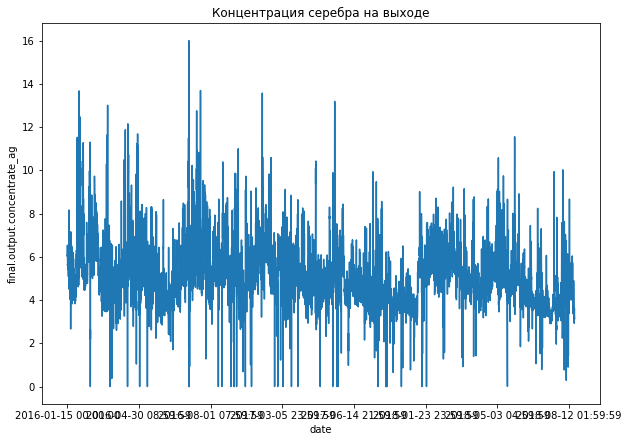

In [26]:
plot = df_train.set_index(
    'date')[final_concentrate_columns[0]].plot(figsize=figsize)
plt.ylabel(final_concentrate_columns[0])
plt.title('Концентрация серебра на выходе')
plt.show()

График неинформативен, выведем средние значения по этапам

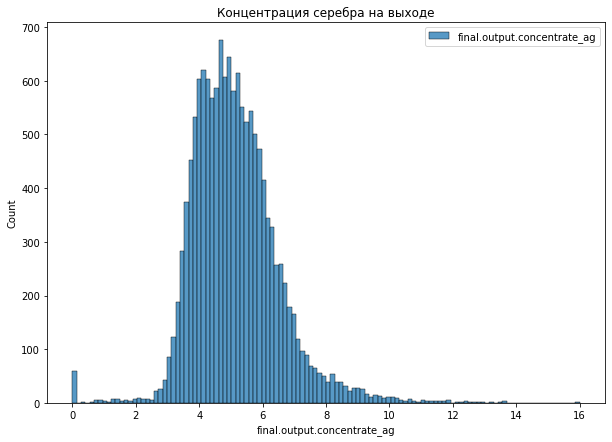

In [27]:
plt.figure(figsize=figsize)
sns.histplot(df_train.set_index('date')[final_concentrate_columns[0]],
             label=final_concentrate_columns[0])
plt.title('Концентрация серебра на выходе')
plt.legend()

In [28]:
df_train[final_concentrate_columns[0]].mean()

5.141920924857091

In [29]:
final_concentrate_columns

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb']

In [30]:
dict_mean = {'final': [], 'primary': [], 'rougher': []}
for i in range(len(final_concentrate_columns)):
    dict_mean['final'].append(df_train[final_concentrate_columns[i]].mean())
    dict_mean['primary'].append(
        df_train[primary_concentrate_columns[i]].mean())
    dict_mean['rougher'].append(
        df_train[rougher_concentrate_columns[i]].mean())

In [31]:
dict_mean

{'final': [5.141920924857091, 44.00379162105571, 10.132847758146394],
 'primary': [8.200915815165981, 32.386835978391346, 9.568544006770484],
 'rougher': [11.775812314356036, 19.43995785143646, 7.664554751481546]}

In [32]:
conc_mean = pd.DataFrame({'final': dict_mean['final'], 'primary': dict_mean['primary'],
                          'rougher': dict_mean['rougher']}, index=['Ag', 'Au', 'Pb'])

In [33]:
conc_mean = conc_mean.reindex(columns=['rougher', 'primary', 'final'])
conc_mean

,rougher,primary,final
Ag,11.775812,8.200916,5.141921
Au,19.439958,32.386836,44.003792
Pb,7.664555,9.568544,10.132848


Видим, что концентрация золота (Au) сильно увеличилась.

Концентрация серебра (Ag) сильно уменьшилась.

Концентрация свинца (Pb) увеличилась.

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках

In [34]:
feed_size = ['primary_cleaner.input.feed_size', 'rougher.input.feed_size']
print('train:')
display(df_train[feed_size].mean().reset_index())

print('\ntest:')
display(df_test[feed_size].mean().reset_index())

train:


,index,0
0,primary_cleaner.input.feed_size,7.322310
1,rougher.input.feed_size,60.239856



test:


,index,0
0,primary_cleaner.input.feed_size,7.266339
1,rougher.input.feed_size,55.952754


Построим гистограммы с автоматическим определением количества блоков 

Text(0.5, 1.0, 'Размер гранул сырья на обучающей выборке')

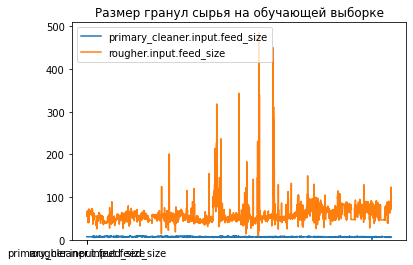

In [35]:
df_train[feed_size].plot().hist(x=feed_size, bins='auto')
plt.title('Размер гранул сырья на обучающей выборке')

Text(0.5, 1.0, 'Размер гранул сырья на тестовой выборке')

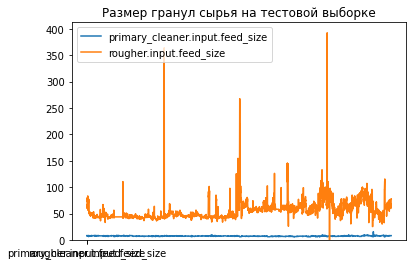

In [36]:
df_test[feed_size].plot().hist(x=feed_size, bins='auto')
plt.title('Размер гранул сырья на тестовой выборке')

Воспользуемся библиотекой seaborn для построения гистограммы на одном графике

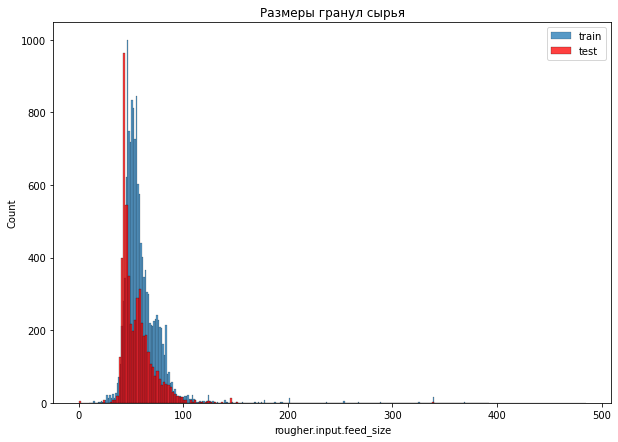

In [37]:
plt.figure(figsize=figsize)

sns.histplot(df_train['rougher.input.feed_size'],
             label='train').set_title('Размеры гранул сырья')
sns.histplot(df_test['rougher.input.feed_size'], label='test', color='r')
plt.legend()

Видим, что распределения на тестовой и обучающей выборках похожи

### Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

In [38]:
# Сумма концентраций на разных этапах
def sum_concentrate(df):
    df_sum_conc = pd.DataFrame()

    df_sum_conc['rougher_input'] = df['rougher.input.feed_au'] + df[
        'rougher.input.feed_ag'] + df['rougher.input.feed_pb']

    df_sum_conc['rougher_output'] = df['rougher.output.concentrate_au'] + df[
        'rougher.output.concentrate_ag'] + df['rougher.output.concentrate_pb']

    df_sum_conc['primary_output'] = df['primary_cleaner.output.concentrate_au'] + df[
        'primary_cleaner.output.concentrate_ag'] + df['primary_cleaner.output.concentrate_pb']

    df_sum_conc['final_output'] = df['final.output.concentrate_au'] + df[
        'final.output.concentrate_ag'] + df['final.output.concentrate_pb']
    return df_sum_conc

In [39]:
df_sum_conc = sum_concentrate(df_train)

In [40]:
def graph_concentrate(df_sum_conc):

    plt.figure(figsize=figsize)

    sns.histplot(df_sum_conc['rougher_input'], label='rougher_input').set_title(
        'rougher_input')
    sns.histplot(df_sum_conc['rougher_output'],
                 label='rougher_output', color='y')
    sns.histplot(df_sum_conc['primary_output'],
                 label='primary_output', color='g')
    sns.histplot(df_sum_conc['final_output'],
                 label='final_output', color='r')

    plt.legend()

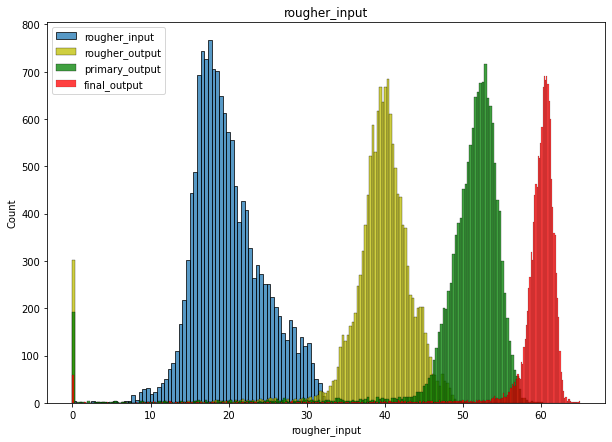

In [41]:
graph_concentrate(df_sum_conc)

Видим нулевые значения концентрации, удалим их по всем колонкам с концентрациями.

Поставим фильтр, который будет больше 0.1, т.к. имеются значения, которые попали в интервал [0, 0.1]

In [42]:
df_train[df_train.isnull().any(1)]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,my_rougher_recovery


In [43]:
df_train = df_train.where((df_train['rougher.input.feed_au'] > 0.1) & (
    df_train['rougher.input.feed_ag'] > 0.1) & (df_train['rougher.input.feed_pb'] > 0.1))

df_train = df_train.where((df_train['rougher.output.concentrate_au'] > 0.1) & (
    df_train['rougher.output.concentrate_ag'] > 0.1) & (df_train['rougher.output.concentrate_pb'] > 0.1))

df_train = df_train.where((df_train['primary_cleaner.output.concentrate_au'] > 0.1) & (
    df_train['primary_cleaner.output.concentrate_ag'] > 0.1) & (df_train['primary_cleaner.output.concentrate_pb'] > 0.1))

df_train = df_train.where((df_train['final.output.concentrate_au'] > 0.1) & (
    df_train['final.output.concentrate_ag'] > 0.1) & (df_train['final.output.concentrate_pb'] > 0.1))

In [44]:
df_train = df_train.reset_index(drop=True)

In [45]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,my_rougher_recovery
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794


In [46]:
df_train[df_train.isnull().any(1)].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,my_rougher_recovery
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Удалим образовавшиеся NaN значения

In [47]:
df_train = df_train.dropna()

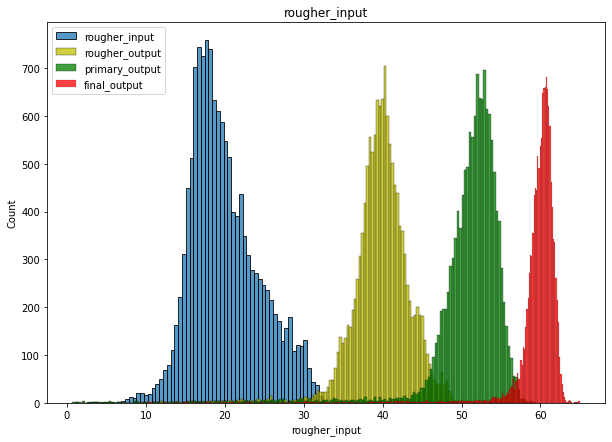

In [48]:
df_sum_conc = sum_concentrate(df_train)
graph_concentrate(df_sum_conc)

Теперь наблюдаем нормальные распределения по разным концентратам без выбросов

## Модель

### Напишем функцию для вычисления итоговой sMAPE

In [49]:
def smape(y, y_o):
    smape_val = (100 * (abs(y - y_o)/((abs(y) + abs(y_o)) / 2))).sum() / len(y)
    return smape_val

In [50]:
def smape_total(rougher, final):
    final_val = (0.25 * rougher) + (0.75 * final)
    return final_val

### Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке

Нужно спрогнозировать сразу две величины:
    
Эффективность обогащения чернового концентрата **rougher.output.recovery**

Эффективность обогащения финального концентрата **final.output.recovery**

Оставим в обучающем датафрейме только те данные, которые есть и в тестовом 

In [51]:
test_columns = df_test.columns
df_train = df_train[test_columns]

In [52]:
df_train[df_train.isnull().any(1)]

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery


In [53]:
print(df_train.shape)
print(df_test.shape)

(13591, 55)
(5290, 55)


Удалим категориальный столбец date 

In [54]:
df_train = df_train.drop('date', axis=1)
df_test = df_test.drop('date', axis=1)

Выделим выборки - признаки и таргеты

In [55]:
features_train = df_train.drop(
    ['rougher.output.recovery', 'final.output.recovery'], axis=1)

target_train = df_train[['rougher.output.recovery',
                         'final.output.recovery']]

features_test = df_test.drop(
    ['rougher.output.recovery', 'final.output.recovery'], axis=1)

target_test = df_test[['rougher.output.recovery',
                       'final.output.recovery']]

In [56]:
target_test.head()

,rougher.output.recovery,final.output.recovery
0,89.993421,70.273583
1,88.089657,68.910432
2,88.412756,68.143213
3,87.360133,67.776393
4,83.236367,61.467078


In [57]:
print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(13591, 52)
(13591, 2)
(5290, 52)
(5290, 2)


In [58]:
features_train[features_train.isnull().any(1)]

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


Нормируем признаки

In [59]:
scaler = StandardScaler()
scaler.fit(features_train)

StandardScaler()

In [60]:
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

In [61]:
smape_score = make_scorer(smape, greater_is_better=False)

Воспользуемся линейной регрессией

In [62]:
model = LinearRegression()
scores_rougher = cross_val_score(
    model, features_train, target_train['rougher.output.recovery'], cv=5, scoring=smape_score)

scores_final = cross_val_score(
    model, features_train, target_train['final.output.recovery'], cv=5, scoring=smape_score)


score_rougher = scores_rougher.mean()
scores_final = scores_final.mean()

smape_itog = smape_total(score_rougher, scores_final)

print(f'sMAPE itog =', round(smape_itog, 2))

sMAPE itog = -10.08


Воспользуемся деревом решений, пройдя по разным глубинам

In [63]:
best_smape_itog = None
best_score_rougher = 100
best_score_final = 100
for depth in range(1, 20, 1):
    model = DecisionTreeRegressor(max_depth=depth, random_state=12345)

    scores_rougher = cross_val_score(
        model, features_train, target_train['rougher.output.recovery'], cv=5, scoring=smape_score)
    
    scores_final = cross_val_score(
        model, features_train, target_train['final.output.recovery'], cv=5, scoring=smape_score)
    

    score_rougher = scores_rougher.mean()
    score_final = scores_final.mean()
    
    smape_itog = smape_total(score_rougher, score_final)
    
    print(f'Depth = {depth}, sMAPE itog =', round(smape_itog, 2))

    if abs(score_rougher) < abs(best_score_rougher):
        best_score_rougher = score_rougher
        best_rougher_model = model
        best_rougher_depth = depth
    if abs(score_final) < abs(best_score_final):
        best_score_final = score_final
        best_final_model = model
        best_final_depth = depth

Depth = 1, sMAPE itog = -9.09
Depth = 2, sMAPE itog = -8.73
Depth = 3, sMAPE itog = -8.62
Depth = 4, sMAPE itog = -9.08
Depth = 5, sMAPE itog = -9.5
Depth = 6, sMAPE itog = -9.63
Depth = 7, sMAPE itog = -10.47
Depth = 8, sMAPE itog = -11.51
Depth = 9, sMAPE itog = -11.73
Depth = 10, sMAPE itog = -13.18
Depth = 11, sMAPE itog = -13.41
Depth = 12, sMAPE itog = -14.05
Depth = 13, sMAPE itog = -14.05
Depth = 14, sMAPE itog = -14.49
Depth = 15, sMAPE itog = -14.13
Depth = 16, sMAPE itog = -14.35
Depth = 17, sMAPE itog = -14.41
Depth = 18, sMAPE itog = -14.31
Depth = 19, sMAPE itog = -14.69


sMAPE при лучших моделях для каждого таргета и глубины дерева:

In [64]:
print(round(smape_total(best_score_rougher, best_score_final), 2))
print(best_rougher_depth)
print(best_final_depth)

-8.62
3
3


Проверим модель на тестовой выборке

In [65]:
predicted_test = best_rougher_model.fit(features_train, target_train['rougher.output.recovery'])
predicted_test= best_rougher_model.predict(features_test)

rougher_score = smape(target_test['rougher.output.recovery'], predicted_test)
print('rougher_score =', round(rougher_score, 2))

rougher_score = 8.26


In [66]:
predicted_test = best_final_model.fit(features_train, target_train['final.output.recovery'])
predicted_test= best_final_model.predict(features_test)

final_score = smape(target_test['final.output.recovery'], predicted_test)
print('final_score =', round(final_score, 2))

final_score = 9.98


In [67]:
smape_itog = smape_total(rougher_score, final_score)

print('Итоговое sMAPE на тестовой выборке', round(smape_itog, 2))

Итоговое sMAPE на тестовой выборке 9.55


Значение несильно отличается от обучающей выборки. 

Выбираем две модели DecisionTreeRegressor с глубиной дерева 3, такие модели на обучающей выборке показали результат лучше, чем у линейной регрессии.


## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке